In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers
from keras import regularizers

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, SGD


Using TensorFlow backend.


# Import data and clean

In [2]:
#  data is from kaggle - https://www.kaggle.com/datamunge/sign-language-mnist
testdf=pd.read_csv('sign_mnist_test.csv')
traindf=pd.read_csv('sign_mnist_train.csv')

In [ ]:
traindf.shape, traindf.head()

In [ ]:
pd.DataFrame(traindf)

In [ ]:
testdf.shape, testdf.head()

In [3]:
# create training labels
labelstr = traindf['label']
traindf.drop(columns =['label'], inplace = True)
traindf.shape, labelstr.head()

((27455, 784), 0     3
 1     6
 2     2
 3     2
 4    13
 Name: label, dtype: int64)

In [4]:
# create testing labels

labelstt = testdf['label']
testdf.drop(columns =['label'], inplace = True)
testdf.shape, labelstt.head()

((7172, 784), 0     6
 1     5
 2    10
 3     0
 4     3
 Name: label, dtype: int64)

In [ ]:
# no 9(J) or 25(Z)
labelstr.value_counts()

In [5]:
# turn test csvs into matrix, flatten, standardize
imagestest = testdf.values
imagestest = np.array([np.reshape(i, (28, 28)) for i in imagestest])
imagestest = np.array([i.flatten() for i in imagestest])
imagestest = imagestest/255

In [6]:
# turn train csvs into matrix, flatten, standardize
images = traindf.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])
images = images/255

In [ ]:
plt.imshow(images[0].reshape(28,28))

In [ ]:
labelstr[0]

In [7]:
# train validate split
image_train, image_val, label_train, label_val = train_test_split(images, labelstr, random_state=23, train_size=.8)

In [8]:
# turn labels into single row matrixes
num_classes = 25
label_train = keras.utils.to_categorical(label_train, num_classes)
label_val = keras.utils.to_categorical(label_val, num_classes)
labelstt = keras.utils.to_categorical(labelstt, num_classes)

In [ ]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

#  MLP

## Relu

In [ ]:
model = models.Sequential()
model.add(layers.Dense(30, activation='relu', input_shape=(784,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(25, activation='sigmoid'))

In [ ]:
model.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

histoire = model.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(histoire)

In [ ]:
results_test1 = model.evaluate(imagestest, labelstt)

In [ ]:
results_test1

## Softmax

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(40, activation='relu'))
model2.add(layers.Dense(20, activation='relu'))
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(25, activation='softmax'))

In [ ]:
model2.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
visualize_training_results(history)

In [ ]:
results_test2 = model2.evaluate(imagestest, labelstt)

In [ ]:
results_test2

### Hypertuning

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(80, activation='relu', input_shape=(784,)))
model3.add(layers.Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.005),))
model3.add(layers.Dense(20, activation='relu'))
model3.add(layers.Dense(10, activation='relu'))
model3.add(layers.Dense(25, activation='softmax'))

model3.compile(optimizer ='sgd' ,loss='categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(image_train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(image_val, label_val))

In [ ]:
results_test3 = model3.evaluate(imagestest, labelstt)

In [ ]:
results_test3

# CNN 2d

In [18]:
image_train  = np.array([np.reshape(i, (28, 28,1)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28,1)) for i in image_val])
imagestest  = np.array([np.reshape(i, (28, 28,1)) for i in imagestest])

In [19]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv2D(32, (3,3), activation='relu',
                        input_shape=(28, 28,1)))
modelcnn.add(layers.MaxPooling2D((2,2)))

modelcnn.add(layers.Conv2D(64, (3,3), activation='relu'))
modelcnn.add(layers.MaxPooling2D((2,2)))

modelcnn.add(layers.Conv2D(128, (3,3), activation='relu'))
modelcnn.add(layers.MaxPooling2D((2,2)))


modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [20]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 5,
                      batch_size=32,
                      validation_data=(image_val, label_val))

Train on 21964 samples, validate on 5491 samples
Epoch 1/5
21964/21964 [==============================] - 29s 1ms/step - loss: 3.1999 - accuracy: 0.0535 - val_loss: 3.1823 - val_accuracy: 0.0616
Epoch 2/5
21964/21964 [==============================] - 30s 1ms/step - loss: 3.1617 - accuracy: 0.0825 - val_loss: 3.1286 - val_accuracy: 0.0827
Epoch 3/5
21964/21964 [==============================] - 26s 1ms/step - loss: 2.9565 - accuracy: 0.1188 - val_loss: 2.7513 - val_accuracy: 0.1273
Epoch 4/5
21964/21964 [==============================] - 28s 1ms/step - loss: 2.3749 - accuracy: 0.2506 - val_loss: 2.0105 - val_accuracy: 0.3671
Epoch 5/5
21964/21964 [==============================] - 27s 1ms/step - loss: 1.7685 - accuracy: 0.4171 - val_loss: 1.4680 - val_accuracy: 0.5303


In [ ]:
results_testcnn = modelcnn.evaluate(imagestest, labelstt)

In [ ]:
results_testcnn

# CNN

In [ ]:
image_train  = np.array([np.reshape(i, (28, 28)) for i in image_train])
image_val  = np.array([np.reshape(i, (28, 28)) for i in image_val])
imagestest  = np.array([np.reshape(i, (28, 28)) for i in imagestest])

In [ ]:
modelcnn = models.Sequential()
modelcnn.add(layers.Conv1D(32, (3), activation='relu',
                        input_shape=(28, 28)))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(64, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))

modelcnn.add(layers.Conv1D(128, (3), activation='relu'))
modelcnn.add(layers.MaxPooling1D((2)))


modelcnn.add(layers.Flatten())
modelcnn.add(layers.Dense(64, activation='relu'))
modelcnn.add(layers.Dropout(.1))

modelcnn.add(layers.Dense(25, activation='softmax'))

modelcnn.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

In [ ]:
results = modelcnn.fit(image_train,
                      label_train,
                      epochs = 20,
                      batch_size=32,
                      validation_data=(image_val, label_val))

In [ ]:
modelcnn.summary()

In [ ]:
visualize_training_results(results)

# Evaluating 

In [ ]:
results_testcnn = modelcnn.evaluate(imagestest, labelstt)

In [ ]:
results_testcnn

## EDA 

In [ ]:
predict = modelcnn.predict(imagestest)

In [ ]:
predict

In [ ]:
predict_labels=np.argmax(predict, axis=1)
predict_labels

In [ ]:
import tensorflow as tf

In [ ]:
modelcnn.get_layer(index= 4).output

In [ ]:
modelcnn.outputs

In [ ]:
# with tf.GradientTape() as tape:
last_conv_layer = modelcnn.get_layer(index = 4)
iterate = tf.keras.models.Model(inputs = modelcnn.inputs, outputs= last_conv_layer)
model_out, last_conv_layer = iterate(imagestest)
class_out = model_out[:, np.argmax(model_out[0])]
grads = tape.gradient(class_out, last_conv_layer)
pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)

In [ ]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = heatmap.reshape((8, 8))
plt.matshow(heatmap)
plt.show()

## 2nd attempt

## Attempt 3

In [ ]:
imagesh  = np.array([np.reshape(imagestest[0], (28, 28))])
imagesh.shape

In [ ]:
imageheat = np.expand_dims(imagestest[0], axis=0)

imageheat.shape
plt.imshow(imagestest[0].reshape(28,28))
imagestest[0].shape

In [14]:
from PIL import Image
Image(filename='testplot.png')

TypeError: 'module' object is not callable

TypeError: 'module' object is not callable

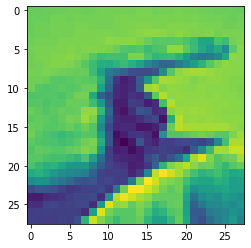

In [15]:
import matplotlib.pyplot as plt

plt.imshow(imagestest[0].reshape(28,28))
plt.savefig('testplot.png')
Image(filename='testplot.png').save('testplot.jpg','JPEG')

In [ ]:
from keras import models
import math 

# Extract model layer outputs
layer_outputs = [layer.output for layer in modelcnn.layers[:6]]

# Create a model for displaying the feature maps
activation_model = models.Model(inputs=modelcnn.input, outputs=layer_outputs)

activations = activation_model.predict(imagesh)

# Extract Layer Names for Labelling
layer_names = []
for layer in modelcnn.layers[:6]:
    layer_names.append(layer.name)

total_features = sum([a.shape[-1] for a in activations])
total_features

n_cols = 12
n_rows = math.ceil(total_features / n_cols)


iteration = 0
fig , axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols, n_rows*1.5))

for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    for ch_idx in range(n_channels):
        row = iteration // n_cols
        column = iteration % n_cols
    
        ax = axes[row, column]

        channel_image = layer_activation[0,
                                          :,
                                         ch_idx]
        # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')

        ax.imshow(channel_image, aspect='auto', cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        
        if ch_idx == 0:
            ax.set_title(layer_names[layer_n], fontsize=10)
        iteration += 1

fig.subplots_adjust(hspace=1.25)
plt.savefig('Intermediate_Activations_Visualized.pdf')
plt.show()

In [ ]:
x = [1,2,3,4,15]

In [ ]:
x.index(1)

In [ ]:
x[-1]

## 4

In [16]:
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys

In [54]:
preds = modelcnn.predict(imagestest)
class_idx = np.argmax(preds[0])
class_output = modelcnn.output[:, class_idx]
last_conv_layer = modelcnn.get_layer(index= 4)

In [55]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([modelcnn.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([imagestest])
for i in range(28):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [56]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

In [57]:
png = 'testplot.png'
img = cv2.imread(png)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

In [58]:
img.shape

(288, 432, 3)

In [59]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

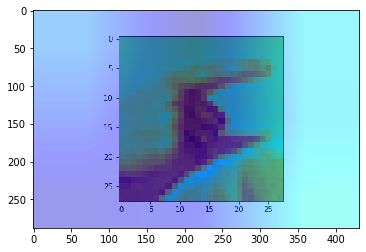

In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(superimposed_img)
plt.show()

# Transfer learning